# Titanic Dataset - Walkthrough with Ken Jee

Youtube link: https://www.youtube.com/watch?v=I3FBJdiExcg
Kaggle link: https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

Following along with Ken Jee's tutorial on Kaggle.

## Step 0: Read the documentation
Understand what the data encompasses and how it is structured.

| Variable | Definition                                       | Key                                                  |
|----------|--------------------------------------------------|------------------------------------------------------|
| survival | did the passenger survive?                       | 0 = No, 1 = Yes                                      |
| pclass   | Ticket class (a proxy for socio-economic status) | 1 = 1st, 2 = 2nd, 3 = 3rd                            |
| sex      | Sex/gender                                       | 'male' or 'female'                                   |
| age      | age in years                                     |                                                      |
| sibsp    | # of siblings / spouses aboard the Titanic       |                                                      |
| parch    | # of parents / children aboard the Titanic       |                                                      |
| ticket   | Ticket Number                                    |                                                      |
| fare     | passenger fare (how much they spent)             |                                                      |
| cabin    | cabin number                                     |                                                      |
| embarked | port of embarkation                              | C = 'Cherbourg', Q = 'Queenstown', S = 'Southampton' |

## Project Planning
* Understand the nature of the data using .info() and .describe()
* Histograms and boxplots to visualize the data
* Value counts for categorical variables
* Identify missing values
* Calculate correlations between variables
* Explore interesting themes
    * Do the wealthy survive more than the poor?
    * Does starting location matter?
    * Does age matter?
    * Does class matter?
    * Age / ticket price scatterplot
    * Young / healthy variable?
    * Total spend?
* Feature Engineering
* Preprocess data together or use a tranformer?
    * use label for train and test
* Should we scale the data?
* Establish model baselines
* Tune models with cross validation

## Import the libraries and data

In [1]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import basic libraries to work with the os and files
import os
from pathlib import Path


In [2]:
# create relative path to the data folder
path = Path('./data')
print(path)

data


In [3]:
# create paths to the data files
path_train = path / 'train.csv'
path_test = path / 'test.csv'

print(path_test)
print(path_train)

data\test.csv
data\train.csv


In [4]:
# load the training and testing data into pandas dataframes

df_train = pd.read_csv(path_train)
df_valid = pd.read_csv(path_test)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_valid.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

#### 1) For numeric data:
    
    * Made histograms to understand distributions
    * Corrplot
    * Pivot table comparing survival rate across numeric variables

#### 2) For categorical data:

    * Made bar charts to understand balance of classes
    * Made pivot tables to undertand relationship with survival

In [7]:
# quick look into our data types and null counts

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# To better understand the numeric data, we want to use the .describe() method. 
# This gives us an understanding of the central tendencies of the data.add()

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# create dataframes for the numeric and categorical features

df_numeric = df_train[['Age', 'SibSp', 'Parch', 'Fare']].copy()
df_categorical = df_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']].copy()

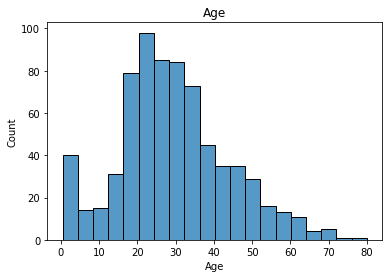

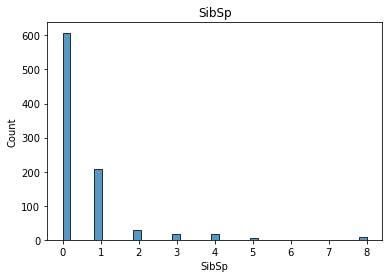

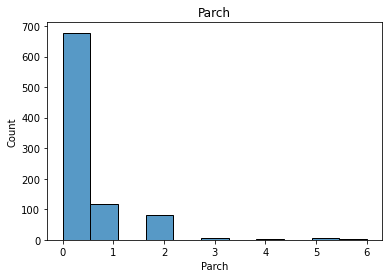

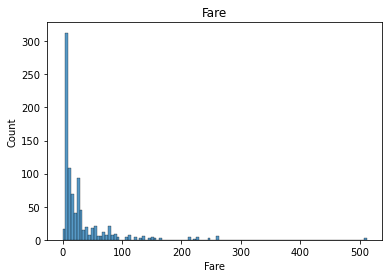

In [10]:
# create histograms for all numeric variabels

for column in df_numeric.columns:
    sns.histplot(df_numeric[column])
    plt.title(column)
    plt.show()

Note: we might want to normalize 'Fare' because it is so heavily skewed.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

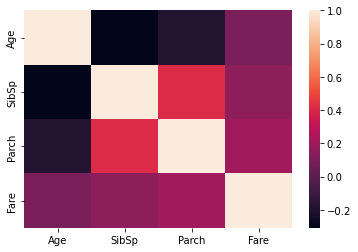

In [11]:
# examine the correlations of the numeric variables

print(df_numeric.corr())

sns.heatmap(df_numeric.corr())

In [12]:
# compare survival rate across Age, SibSp, Parch, and Fare using a pivot table

pd.pivot_table(df_train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


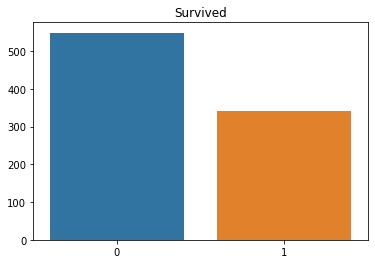

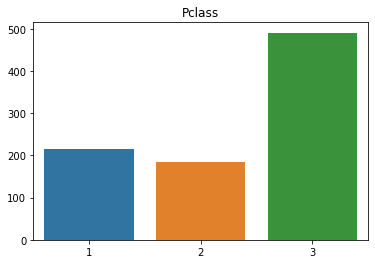

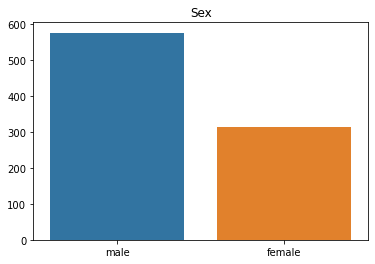

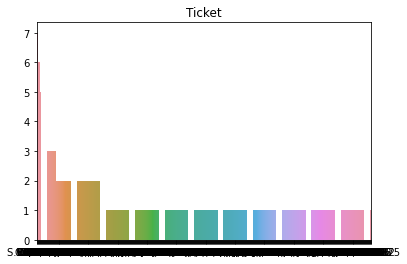

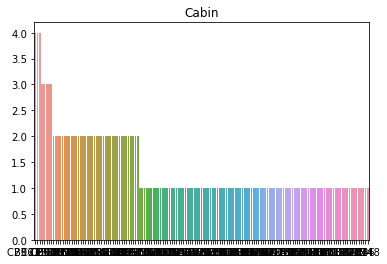

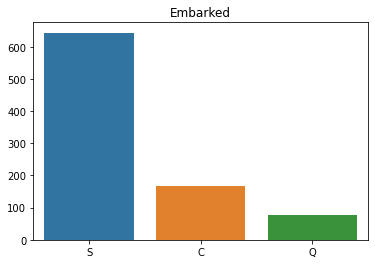

In [13]:
# create barcharts for the categorical variables

for column in df_categorical.columns:
    sns.barplot(x=df_train[column].value_counts().index, y=df_train[column].value_counts().values)
    plt.title(column)
    plt.show()

Cabin and Ticket graphs are messy. This would be a good opportunity to do some feature engineering.

In [14]:
# comparing survival and each of these categorical variables

print(pd.pivot_table(df_train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')) 
print()
print(pd.pivot_table(df_train, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(df_train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering

1) Cabin - simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multi) impacted survival)

2) Ticket - Do different ticket types impact survival rates?

3) Does a person's title relate to survial rates?

In [15]:
# how many people had multiple cabins?

df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

df_train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [16]:
# Create a pivot table to compare survival by cabin_multiple

pd.pivot_table(df_train, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [20]:
# Create a new feature called 'cabin_letter' that extracts the first letter of the cabin.
# 'n' stands for 'null' if the cabin is null

df_train['cabin_letter'] = df_train.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'n')
df_train.cabin_letter.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [21]:
# create a pivot table to compare survival by cabin_letter

pd.pivot_table(df_train, index='Survived', columns='cabin_letter', values='Ticket', aggfunc='count')

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [22]:
# we need to understand ticket number
# numeric vs non-numeric

df_train['ticket_numeric'] = df_train.Ticket.apply(lambda x: 1 if x.isdigit() else 0)
df_train['ticket_letters'] = df_train.Ticket.apply(lambda x: len(x) if x.isalpha() else 0)

In [23]:
df_train.ticket_numeric.value_counts()

1    661
0    230
Name: ticket_numeric, dtype: int64

In [24]:
df_train.ticket_letters.value_counts()

0    887
4      4
Name: ticket_letters, dtype: int64

In [25]:
# use a pivot table to compare survival by ticket_numeric

pd.pivot_table(df_train, index='Survived', columns='ticket_numeric', values='Ticket', aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [26]:
# create a new feature called 'name_title' that extracts the title from the name

df_train['name_title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_train.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [27]:
# create a pivot table to compare survival by name_title

pd.pivot_table(df_train, index='Survived', columns='name_title', values='Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Grouping the titles together might be worthwhile.

## Data Preprocessing for Modeling

1) Drop null values from Embarked (2)

2) Include only relevant variables (since we have limited data, I wanted to exclude things like name and passenger ID so that we could have a reasonable number of features for our models to deal with)

3) Do categorical transforms on all data. Usually we would use a tranformer, but with this approach we can ensure that our training and testing data are in the same format. We may also be able to infer something about the shape of the test data through this method. I will stress, this is enerally nt recommended outside of a competition. (Use one hot encoding)

4) Impute data with mean for fare and age (could also experiment with median)

5) Normalize fare using algorithm to give a semblence of a normal distribution

6) Scaled data 0 - 1 using StandardScaler